# Production Technology

The dataset contains `N = 441` firms observed over `T = 12` years, 1968-1979. There variables are: 
* `lcap`: Log of capital stock, $k_{it}$ 
* `lemp`: log of employment, $\ell_{it}$ 
* `ldsa`: log of deflated sales, $y_{it}$
* `year`: the calendar year of the observation, `year` $ = 1968, ..., 1979$, 
* `firmid`: anonymized indicator variable for the firm, $i = 1, ..., N$, with $N=441$. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import PyFileAssignment1 as pfa1
%load_ext autoreload
%autoreload 2

The structure of this notebook proceeds as follows. In section 1 we load the data and restrict the observations so we only use observations from the first 3 years of data (1968-1970). Next, in section 2, we proceed to perform some descriptive statics and in section 3 we convert the dataformat to numpy, so that we are ready for estimation. In section 4-7 we perform Pooled OLS, FE, RE, and FD estimation respectively. Lastly in Section 8, we perform a variety of tests.

# 1. Loading data

In [2]:
#load data from csv file
dat = pd.read_csv('firms.csv')

In [3]:
#sorting data by firmid and year
dat = dat.sort_values(['firmid', 'year'])

In [4]:
#save only first 3 years of data
dat = dat.loc[dat['year'].isin([1968, 1969, 1970]),:]

In [5]:
#see first 20 rows of data
dat.head(20)

,firmid,year,lcap,lemp,ldsa
0,1,1968,0.998602,-0.242185,0.349053
1,1,1969,0.925214,-0.241278,0.312492
2,1,1970,0.879616,-0.265134,0.347566
12,2,1968,-0.069588,-0.323021,-0.945831
13,2,1969,-0.056724,-0.358177,-1.143830
14,2,1970,-0.032680,-0.406512,-1.299890
24,3,1968,1.188212,1.546823,1.314148
25,3,1969,1.147733,1.452367,0.949586
26,3,1970,1.048826,1.369184,0.819871
36,4,1968,-0.284911,0.526345,0.035088


We add year dummies to our dataset

In [6]:
#create dummies for year
year_dummies = pd.get_dummies(dat['year'], prefix='year',dtype='int64')
#add dummies to data
dat = pd.concat([dat, year_dummies], axis=1)

In [7]:
dat.head(20)

,firmid,year,lcap,lemp,ldsa,year_1968,year_1969,year_1970
0,1,1968,0.998602,-0.242185,0.349053,1,0,0
1,1,1969,0.925214,-0.241278,0.312492,0,1,0
2,1,1970,0.879616,-0.265134,0.347566,0,0,1
12,2,1968,-0.069588,-0.323021,-0.945831,1,0,0
13,2,1969,-0.056724,-0.358177,-1.143830,0,1,0
14,2,1970,-0.032680,-0.406512,-1.299890,0,0,1
24,3,1968,1.188212,1.546823,1.314148,1,0,0
25,3,1969,1.147733,1.452367,0.949586,0,1,0
26,3,1970,1.048826,1.369184,0.819871,0,0,1
36,4,1968,-0.284911,0.526345,0.035088,1,0,0


# 2. Descriptives

CHR: Synes ikke det giver mening at have deskriptiv statistik med alligevel - vores variable er alle i logaritmer. Men måske bare have et afsnit, hvor vi siger, at der beskriver antal observationer, år, variable osv. Dermed kan nedenstående slettes såfremt i er enige.

In [8]:
dat.describe()

,firmid,year,lcap,lemp,ldsa,year_1968,year_1969,year_1970
count,1323.000000,1323.000000,1.323000e+03,1.323000e+03,1.323000e+03,1323.000000,1323.000000,1323.000000
mean,221.000000,1969.000000,-3.432577e-08,5.291005e-09,3.253968e-08,0.333333,0.333333,0.333333
std,127.353547,0.816805,1.367661e+00,1.212370e+00,1.238870e+00,0.471583,0.471583,0.471583
min,1.000000,1968.000000,-3.864950e+00,-3.108660e+00,-3.433130e+00,0.000000,0.000000,0.000000
25%,111.000000,1968.000000,-9.629080e-01,-8.435585e-01,-9.082370e-01,0.000000,0.000000,0.000000
50%,221.000000,1969.000000,-1.016350e-01,-1.141760e-01,-1.142770e-01,0.000000,0.000000,0.000000
75%,331.000000,1970.000000,9.708763e-01,8.067791e-01,8.648864e-01,1.000000,1.000000,1.000000
max,441.000000,1970.000000,3.993508e+00,3.187258e+00,3.418170e+00,1.000000,1.000000,1.000000


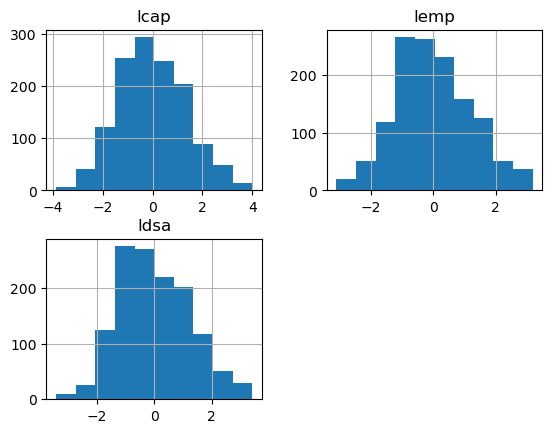

In [9]:
dat[['lcap','lemp','ldsa']].hist();

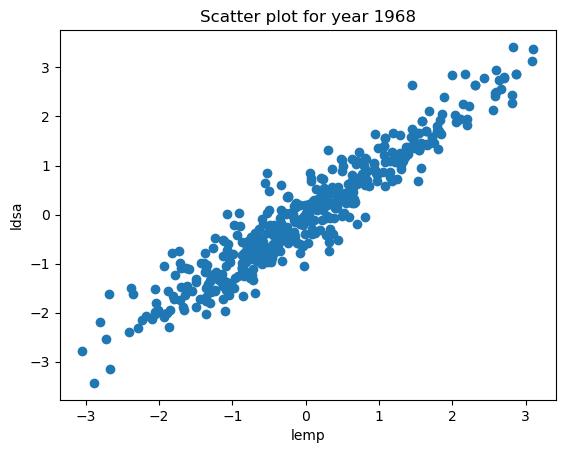

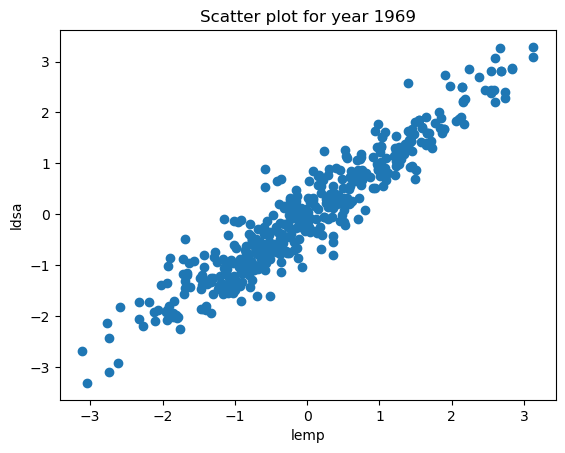

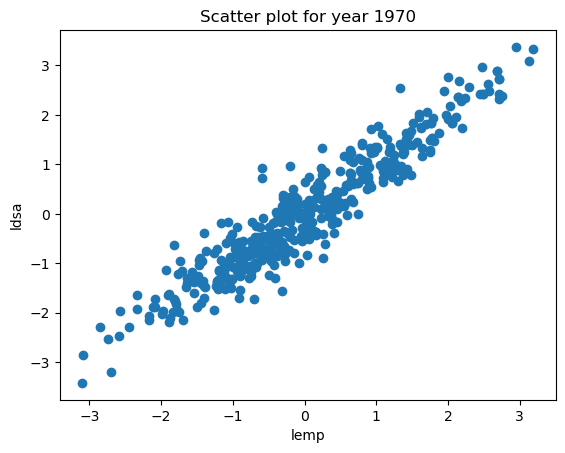

In [10]:
# iterate over each year
for year in dat['year'].unique():
    # create a scatter plot for the current year
    plt.scatter(dat.loc[dat['year']==year, 'lemp'], dat.loc[dat['year']==year, 'ldsa'])
    plt.title(f'Scatter plot for year {year}')
    plt.xlabel('lemp')
    plt.ylabel('ldsa')
    plt.show()


# 3. Converting data to numpy format 

In [11]:
dat.ldsa.values.shape

(1323,)

In [12]:
#amount of firms and years, and check if balanced panel data
N = dat.firmid.unique().size
T = dat.year.unique().size
assert dat.shape[0] == N*T, f'Error: data is not a balanced panel'
print(f'Data has N={N} and T={T}')

Data has N=441 and T=3


In [13]:
y = dat.ldsa.values.reshape((N*T,1)) #ldsa -> y

ones = np.ones((N*T,1)) #constant
l = dat.lemp.values.reshape((N*T,1)) #lemp -> l
k = dat.lcap.values.reshape((N*T,1)) #lcap -> k
X = np.hstack([ones, l, k]) #create X matrix

#only add year dummies for 1969 and 1970 to avoid dummy trap
y1969 = dat.year_1969.values.reshape((N*T,1))
y1970 = dat.year_1970.values.reshape((N*T,1))
X_year = np.hstack([ones, l, k, y1969, y1970]) #create X matrix with year dummies for 1969 and 1970

In [14]:
# Adding variable names
label_y = 'Log of Sales'
label_x = [
    'Constant', 
    'Log of Employment', 
    'Log of Capital'
]
label_x_year = [
    'Constant', 
    'Log of Employment', 
    'Log of Capital',
    'year = 1969',
    'year = 1970' 
]

# 4. Pooled OLS

Estimate Pooled OLS

In [15]:
pols_result = pfa1.estimate(y,X,T=T)

In [16]:
pols_result

{'b_hat': array([[3.84115800e-08],
        [6.86032641e-01],
        [2.76809473e-01]]),
 'se': array([[0.00980976],
        [0.01944374],
        [0.017236  ]]),
 'se_robust': array([[0.35640623],
        [0.70642604],
        [0.62621496]]),
 'sigma2': array([[0.1273141]]),
 't_values': array([[3.91564986e-06],
        [3.52829626e+01],
        [1.60599605e+01]]),
 't_values_robust': array([[1.07774715e-07],
        [9.71131585e-01],
        [4.42035865e-01]]),
 'R2': array([[0.91717388]]),
 'cov': array([[ 9.62313644e-05, -1.24597599e-11,  1.18097188e-11],
        [-1.24597599e-11,  3.78058903e-04, -3.04711209e-04],
        [ 1.18097188e-11, -3.04711209e-04,  2.97079682e-04]]),
 'cov_robust': array([[ 1.27025401e-01, -1.64468830e-08,  1.55888288e-08],
        [-1.64468829e-08,  4.99037752e-01, -4.02218796e-01],
        [ 1.55888287e-08, -4.02218796e-01,  3.92145181e-01]])}

Print table

In [17]:
pfa1.print_table((label_y,label_x), pols_result,title='Pooled OLS', floatfmt='.4f')

Pooled OLS
Dependent variable: Log of Sales

                     Beta      Se    t-values    Se (robust)    t-values (robust)
-----------------  ------  ------  ----------  -------------  -------------------
Constant           0.0000  0.0098      0.0000         0.3564               0.0000
Log of Employment  0.6860  0.0194     35.2830         0.7064               0.9711
Log of Capital     0.2768  0.0172     16.0600         0.6262               0.4420
R² = 0.917
σ² = 0.127


We now do the same where year dummies are added

In [18]:
pols_result_year = pfa1.estimate(y,X_year,T=T)

In [19]:
pfa1.print_table((label_y,label_x_year), pols_result_year,title='Pooled OLS with year dummies', floatfmt='.4f')

Pooled OLS with year dummies
Dependent variable: Log of Sales

                      Beta      Se    t-values    Se (robust)    t-values (robust)
-----------------  -------  ------  ----------  -------------  -------------------
Constant           -0.0000  0.0170     -0.0000         0.6173              -0.0000
Log of Employment   0.6860  0.0195     35.2562         0.7064               0.9711
Log of Capital      0.2768  0.0172     16.0478         0.6262               0.4420
year = 1969         0.0000  0.0240      0.0000         0.8730               0.0000
year = 1970         0.0000  0.0240      0.0000         0.8730               0.0000
R² = 0.917
σ² = 0.128


See no effect -> leave them out

# 5. Fixed effects

First we need to calculate the transformation matrix
$$
\mathbf{Q}_{3}:=\mathbf{I}_{3}-\left(\begin{array}{ccc}
1/3 & 1/3 &1/3\\
1/3 & 1/3 &1/3\\
1/3 & 1/3 &1/3
\end{array}\right)_{3\times 3}
$$
so that we can demean our variables

In [20]:
#Transform data
Q_T = np.eye(T) - 1/T * np.ones((T,T))
y_dot = pfa1.perm(Q_T,y)
X_dot = pfa1.perm(Q_T,X)

In [21]:
#remove constant;
X_dot = X_dot[:,1:]
label_x_dot = label_x[1:]

Now we can stimate FE model

In [22]:
#estimate FE model
fe_result = pfa1.estimate(y_dot,X_dot,transform='fe',T=T)

Print table

In [23]:
pfa1.print_table((label_y,label_x_dot), fe_result,title='Fixed Effects', floatfmt='.4f') 

Fixed Effects
Dependent variable: Log of Sales

                     Beta      Se    t-values    Se (robust)    t-values (robust)
-----------------  ------  ------  ----------  -------------  -------------------
Log of Employment  0.6004  0.0346     17.3515         1.0264               0.5849
Log of Capital     0.0502  0.0382      1.3143         1.1332               0.0443
R² = 0.284
σ² = 0.008


# 6. Random effects

**6.1:** The between estimator

Creating $P_3$ vector and estimating between groups model

\begin{equation} 
\mathbf{P}_3 \equiv \left( \frac{1}{3}, \frac{1}{3}, \frac{1}{3} \right)_{1 \times 3}  \notag
\end{equation}

In [24]:
# Transform the data
P_T = np.ones((1,T)) * 1/T
y_mean = pfa1.perm(P_T, y)
X_mean = pfa1.perm(P_T, X)

# Estimate 
be_result = pfa1.estimate(y_mean, X_mean, transform='be', T=T)
pfa1.print_table((label_y, label_x), be_result, title="Between Estimator", floatfmt='.4f')

Between Estimator
Dependent variable: Log of Sales

                     Beta      Se    t-values    Se (robust)    t-values (robust)
-----------------  ------  ------  ----------  -------------  -------------------
Constant           0.0000  0.0166      0.0000         0.3483               0.0000
Log of Employment  0.6856  0.0334     20.5331         0.6988               0.9811
Log of Capital     0.2778  0.0296      9.3935         0.6190               0.4488
R² = 0.921
σ² = 0.122


**6.2:** Calculating $\hat{\lambda}$

In [25]:
# Calculate lambda
sigma2_u = fe_result['sigma2']
sigma2_w = be_result['sigma2']
sigma2_c = sigma2_w - 1/T * sigma2_u
_lambda = 1 - np.sqrt(sigma2_u / (sigma2_u + T*sigma2_c))

# Print lambda 
print(f'Lambda is approximately equal to {_lambda.item():.4f}.')

Lambda is approximately equal to 0.8511.


**6.3:** Transform and estimate RE estimator

In [26]:
# Transform the data
C_T = np.eye(T)-_lambda*P_T
y_re = pfa1.perm(C_T,y)
x_re = pfa1.perm(C_T,X)

Estimate the RE model

In [27]:
#estimate RE model
re_result = pfa1.estimate(y_re,x_re,transform='re',T=T)

Print table

In [28]:
# Print table
pfa1.print_table((label_y,label_x), re_result,title='Random Effects', floatfmt='.4f')

Random Effects
Dependent variable: Log of Sales

                     Beta      Se    t-values    Se (robust)    t-values (robust)
-----------------  ------  ------  ----------  -------------  -------------------
Constant           0.0000  0.0169      0.0000         0.6156               0.0000
Log of Employment  0.6912  0.0235     29.4502         0.8528               0.8106
Log of Capital     0.2476  0.0214     11.5909         0.7762               0.3190
R² = 0.797
σ² = 0.008


# 7. First differences

To transform our variables into first differences we need to construct and apply the following matrix

$$
\mathbf{D}:=\left(\begin{array}{ccc}
-1 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}\right)_{2 \times 3}.
$$

In [29]:
# Transform the data
D_T = - np.eye(T-1, T) + np.eye(T-1, T, k=1)
y_diff = pfa1.perm(D_T, y)
X_diff = pfa1.perm(D_T, X)

In [30]:
#remove constant;
X_diff = X_diff[:,1:]
label_x_diff = label_x[1:]

Estimate FD model

In [31]:
#estimate
fd_result = pfa1.estimate(y_diff,X_diff,transform='fd',T=T)

Present table

In [32]:
pfa1.print_table((label_y,label_x_diff), fd_result,title='First Differences', floatfmt='.4f')

First Differences
Dependent variable: Log of Sales

                     Beta      Se    t-values    Se (robust)    t-values (robust)
-----------------  ------  ------  ----------  -------------  -------------------
Log of Employment  0.5509  0.0365     15.0788         1.0839               0.5083
Log of Capital     0.0381  0.0432      0.8816         1.2825               0.0297
R² = 0.217
σ² = 0.013


# 8. Tests

## Wald Test

The Wald test is a statistical hypothesis test used to assess the significance of coefficients in regression models. It evaluates whether specific linear combinations of coefficients are equal to certain values.



In [1]:
regressions = [
    {"name": "Pooled OLS", "trans": "", "y": y, "X": X},
    {"name": "Fixed Effects", "trans": "fe", "y": y_dot, "X": X_dot},
    {"name": "First Difference", "trans": "fd", "y": y_diff, "X": X_diff},
    {"name": "Random Effects", "trans": "re", "y": y_re, "X": x_re}
]

for regression in regressions:
    name = regression["name"]
    trans = regression["trans"]
    y_reg = regression["y"]
    X_reg = regression["X"]

    wald_stat, p_val, test_result = pfa1.wald_test(y_reg, X_reg, trans=trans, T=T)
    
    print(f"Regression Model: {name}")
    print(f"Wald Statistic: {wald_stat}")
    print(f"P-value: {p_val}")
    print(f"Test Result: {test_result}\n")

NameError: name 'y' is not defined